<a href="https://colab.research.google.com/github/sungmich/2022_AI/blob/main/%EC%8B%A4%EC%8A%B51_1_%EC%97%B0%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np #파이썬의 수치 계산 (행렬)

In [ ]:
inputs = np.array([[2], [4], [6], [8]], dtype='float32')#dtype => data type
targets = np.array([3,4,5,6], dtype='float32')

print(inputs)
print(targets)

[[2.]
 [4.]
 [6.]
 [8.]]
[3. 4. 5. 6.]


In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

#torch => tesor 
#numpy => array(행렬)

print(inputs)
print(targets)

tensor([[2.],
        [4.],
        [6.],
        [8.]])
tensor([3., 4., 5., 6.])


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(inputs, targets)
#TensorDataset => 정의역이랑 치역을 묶는다는 느낌 => 학습데이터랑 정답데이터랑 묶음 
# => 예시에서는 (2, 3) (4, 4) (6, 5) (8, 6)
print(next(iter(dataset)))

loader = DataLoader(dataset, batch_size=4)
#DataLoader => 데이터를 뿌려주는 역할
#batch_size => 한 번 학습할 때의 묶음
print(next(iter(loader)))

(tensor([2.]), tensor(3.))
[tensor([[2.],
        [4.],
        [6.],
        [8.]]), tensor([3., 4., 5., 6.])]


In [ ]:
w = torch.randn(1,1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
#requires_grad
print(w)
print(b)

tensor([[0.6220]], requires_grad=True)
tensor([-2.5596], requires_grad=True)


In [ ]:
def model(X):
  return X @ w.t() + b
# @   : 행렬연산 
# .t  : transpose => 여러 차원에서 사용 => 이 실습에서는 무의미

In [ ]:
def mse_loss(predictions, targets):
  difference = predictions - targets
  return torch.sum(difference * difference) /difference.numel()
  #numel  : 원소 개수

In [ ]:
for x, y in dataset:
  preds = model(x)
  print(f'Prediction: {preds.item():.2f} / Actual target: {y.item():.2f} / loss: {mse_loss(preds, y):.2f}')
#학습 전 예측 결과

Prediction: 0.70 / Actual target: 3.00 / loss: 5.27
Prediction: 0.09 / Actual target: 4.00 / loss: 15.28
Prediction: -0.52 / Actual target: 5.00 / loss: 30.49
Prediction: -1.13 / Actual target: 6.00 / loss: 50.90


In [ ]:
epochs = 10000
for i in range (epochs):
  for x, y in loader:
    preds = model(x)

    loss = mse_loss(preds[:, 0], y)
    loss.backward()

    with torch.no_grad():
      w -= w.grad * 1e-3
      b -= b.grad * 1e-3

      w.grad.zero_()
      b.grad.zero_()

In [ ]:
for x, y in dataset:
  preds = model(x)
  print(f'Prediction: {preds.item():.2f} / Actual target: {y.item():.2f} / loss: {mse_loss(preds, y):.2f}')
#학습 후 결과

Prediction: 2.99 / Actual target: 3.00 / loss: 0.00
Prediction: 3.99 / Actual target: 4.00 / loss: 0.00
Prediction: 5.00 / Actual target: 5.00 / loss: 0.00
Prediction: 6.01 / Actual target: 6.00 / loss: 0.00


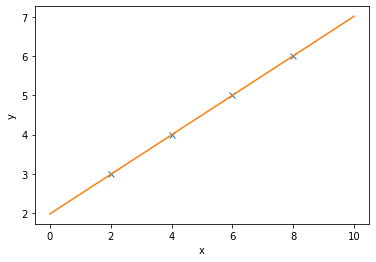

In [ ]:
import matplotlib.pyplot as plt

x_tmp = np.arange(0,11,1)
y_tmp = w.detach().numpy()*x_tmp+b.detach().numpy()
plt.plot(inputs,targets,'x')
plt.plot(x_tmp,y_tmp[0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()